# Exponentielle de matrice

Cet appendice est dédié à l'exponentielle de matrice, et pour comprendre ce qu'on en fait dans le cas présent. Voici certaines ressources de vulgarisation scientifique sur le sujet :

- [How (and why) to raise e to the power of a matrix](https://youtu.be/O85OWBJ2ayo) (3Blue1Brown, YouTube)

Prenons le graphe suivant :

┌ Info: Precompiling LightGraphs [093fc24a-ae57-5d10-9952-331d41423f4d]
└ @ Base loading.jl:1342
┌ Info: Precompiling GraphPlot [a2cc645c-3eea-5389-862e-a155d0052231]
└ @ Base loading.jl:1342


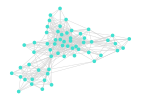

In [1]:
using LightGraphs, GraphPlot

g = SimpleGraph(loadgraph("../data/0001.lg")) # version non dirigée
x, y = spring_layout(g)
gplot(g, x, y)

Voici sa matrice d'adjacence.

In [2]:
Adj = adjacency_matrix(g)

59×59 SparseArrays.SparseMatrixCSC{Int64, Int64} with 814 stored entries:
⠮⠃⠯⠿⠹⢇⠿⡿⠀⣀⡼⠾⠯⠀⠃⠸⠬⢂⢀⡄⠁⠀⠎⠀⠀⠠⠍⠠⠺⡇
⣯⡇⡀⡨⣬⡒⢥⣹⠁⢘⢨⣬⡱⠀⡄⢘⢈⡄⠀⠀⢁⣠⢄⠀⠀⠀⢁⠀⣬⡅
⠷⢆⢢⠻⠪⠂⠝⠺⠀⣜⡸⠰⠾⠀⠀⠘⠜⢂⢀⡐⠒⠐⠔⠀⠁⠘⠀⠠⠰⡇
⣿⡧⣅⣳⣳⡁⣀⡸⡀⠠⢰⣐⣬⡄⠂⠰⠈⡠⠀⠀⢄⠒⠀⠀⠀⠀⢁⠈⢀⠇
⠀⢠⣁⢀⣀⢤⠀⡈⠀⡠⣌⠡⠙⠑⠀⢂⢋⢠⢢⠐⠀⠀⣀⠀⠀⠈⠈⠀⢀⠄
⣲⡏⡂⣶⢒⡊⢐⢲⠆⡙⣀⠘⢲⠀⡆⢰⠐⡌⠈⠁⠀⣀⠅⠀⠀⠀⠂⠀⣖⡃
⠋⠃⠑⠊⠚⠃⠂⠿⢗⠀⠘⠒⢪⡲⢲⡞⡖⠀⡇⢼⠒⠀⠐⡶⣶⠞⠒⡀⠐⠃
⣉⡀⣀⢉⣀⠀⢈⡀⠠⢀⢈⣉⣸⠶⡠⠊⢆⠁⠆⠰⠀⠈⠀⠖⠂⠂⠀⢆⣁⡀
⠢⢃⠂⠴⠲⢁⠂⡠⠋⣐⡐⠤⠘⠉⠌⠑⠀⠀⢁⡈⠀⠤⡀⠙⠀⠁⠀⠁⠄⡀
⠀⠴⠀⠀⢀⠰⠀⠀⢈⠒⠆⠀⣉⣍⢈⡁⡁⠰⡄⠉⠀⠀⠀⠈⡀⠁⠀⠠⠀⠆
⠁⠀⠁⣰⢘⠀⢠⠑⠀⠀⠀⢠⠘⠀⡀⠀⠀⡄⠀⠀⠀⡠⠘⠀⠀⠀⠀⠀⠘⠀
⠊⠁⠀⠑⠐⠁⠀⠀⠀⠘⠁⠁⢰⡤⢠⠄⣄⠈⡀⠀⠒⠀⠀⡠⢤⡄⠀⡄⠑⠁
⠀⡀⠀⠀⣁⠀⠀⠀⡀⠀⠀⠀⣸⠟⠨⠀⠄⠀⠄⠈⠀⠀⠀⠷⠀⠀⢀⠀⠀⠀
⠃⡁⠁⠐⠀⡀⡁⠐⠂⠀⠈⠀⠘⠠⠠⢄⠄⠀⠀⡀⠀⠀⠀⠤⠀⠐⠊⠀⠐⠁
⠾⠦⠆⠿⠴⠦⠤⠔⠀⠔⠼⠹⠴⠀⠁⠸⠀⠡⠠⠄⠒⠀⠕⠀⠀⠀⠔⠀⠠⠂

## Puissances successives

Intéressons-nous au puissances successives de cette matrice.

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1342
┌ Info: Precompiling GR_jll [d2c73de3-f751-5644-a686-071e5b155ba9]
└ @ Base loading.jl:1342


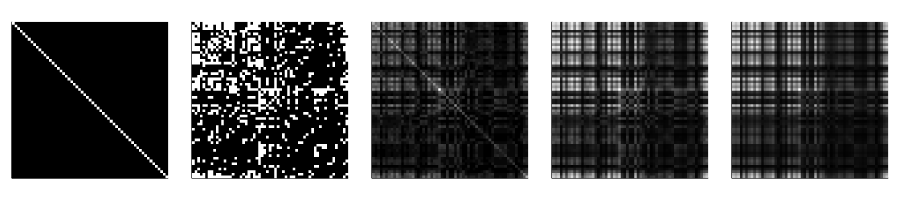

In [3]:
using Plots, Colors
A = Matrix(Adj);
"affiche une matrice comme une image en niveau de gris"
printM(M) = plot(Gray.(M./maximum(M)), ticks=false)
"génère les n+1 puissances successives de a"
function powers(a, n)
    if n == 0
        return (one(a),)
    else
        prev = powers(a, n-1)
        return prev..., prev[end]*a
    end
end
plot([printM(i) for i in powers(A,4)]..., layout=(1,5), size=(900,200))

Le coefficient en position $(i, j)$ de la $k\text{ième}$ puissance de la matrice d'ajacence, $(A^k)_{pq}$, donne le nombre de chemins de longueur $k$ partant du noeud $i$ et arrivant au noeud $j$.

- les chemins de longueur _zéro_ n'arrivent que sur le noeud lui-même
- les chemins de longueur _un_ arrivent uniquement sur les voisins du noeud
- les chemins de longueur _deux_ arrivent sur le noeud lui-même, ses voisins, et d'autres éventuellement plusieurs fois
- ...

Chaque chemin dans un sens étant valide dans l'autre, cette matrice est symétrique.

## Marche aléatoire

Tant qu'on en est ici, autant profiter pour faire un détour du côté des marches aléatoires. Si à chaque pas on choisit au hasard un des chemins (donc avec une probabilité inverse au degré du noeud), on obtient les figures suivantes. La dernière est la matrice de probabilité où la probabilité d'arriver en $j$ après une marche infinie partant de $i$ dépend uniquement du degré de $j$.

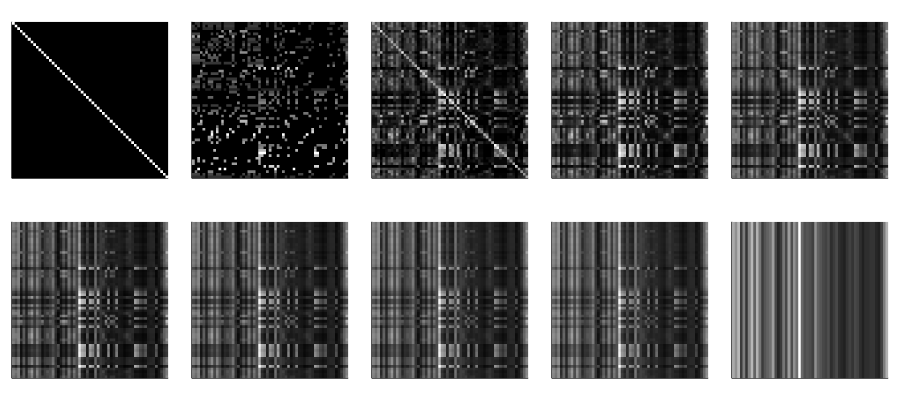

In [4]:
using LinearAlgebra
d = degree(g)
D_ = Diagonal(1 ./d)
P = D_*A
plot([printM(i) for i in powers(P,8)]..., printM(repeat(d, 1, nv(g))'), layout=(2,5), size=(900,400))

Dans ce cas, le processus de diffusion est non réversible, la matrice est donc non symétrique.

## Exponentielle de matrice

Reprenons les puissances successives. Si on additionne les puissances $k$ successives en appliquant un facteur $\frac{1}{k}$ par rapport à la précédente, on obtient $$ \sum_{k=0}^{\infty} \frac{A^k}{k!} = \exp{A} $$

Et le coefficient $(i, j)$ est appelé _communicabilité_ entre $i$ et $j$ (dans ref 2).

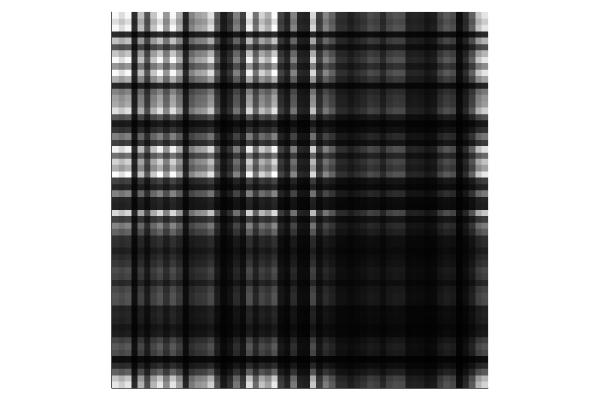

In [5]:
E = exp(A)
printM(E)

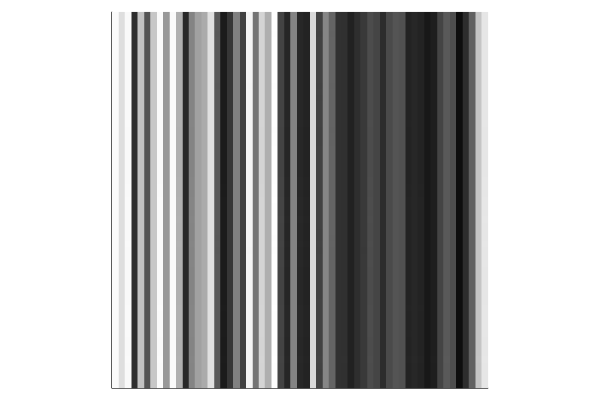

In [6]:
printM(E./E[rand(1:59),:])

Toutes les lignes sont quasiment identiques, à un facteur près, il y a donc un problème (?). En appliquant un facteur à $A$, on peut changer l'importance relative des différentes puissances : $\exp(\alpha A)$ (normalisation globale)

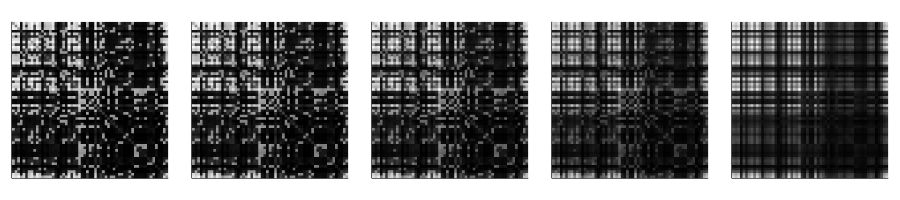

In [7]:
plot([printM(exp(A./i)-I) for i in 15:-3:1]..., layout=(1,5), size=(900,200))

On peut aussi essayer une normalisation locale par les degrés des noeuds.

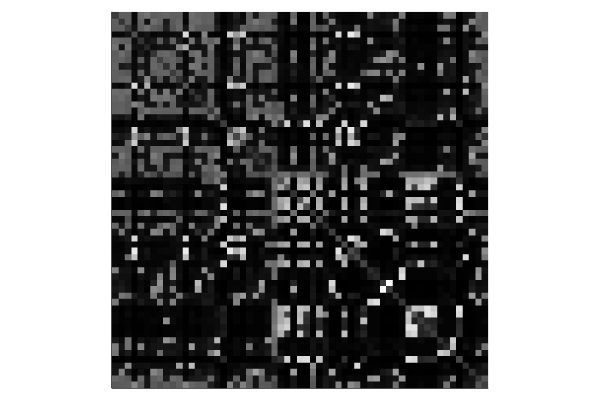

In [8]:
En = exp(√D_*A*√D_)
EnmI = En-I
printM(EnmI)

Visualisons cette normalisation locale sur le graphe :

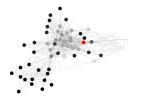

In [10]:
rescale(v::Vector) = v./maximum(v)
for i in 1:nv(g)
    colors = RGB.(Gray.(rescale(EnmI[:,i])))
    colors[i] = colorant"red"
    display(gplot(g, x, y, nodefillc=colors, edgestrokec=RGBA(0,0,0,0.1)))
    IJulia.clear_output(true)
    sleep(2)
end
# on normalise chaque ligne ainsi :
# h = map(maximum, eachrow(EnmI))
# printM(EnmI./h)

Pour chaque noeud (en rouge) on peut voir les noeuds qui sont le plus proche (en blanc) et le plus éloigné (en noir). Cela permet de trier l'entourage au sens large (pas seulement le voisinage immédiat) par ordre de proximité.

# Approfondir

- [1] Pons, P., Latapy, M., 2005. Computing communities in large networks using random walks.
- [2] Estrada, E., Hatano, N., 2008. Communicability in complex networks.